In [1]:
%pylab inline

from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


## INDIPENDENZA DELLE RIVOLTE
Le rivolte sono eventi indipendenti? simulo per 10 volte fino a che non ottengo 5 rivolte ricavandone alcune caratteristiche (tempo di attesa, partecipanti e durata)

### Presa Dati

In [2]:
medie_attesa = [1.33333333333333, 79.3333333333333, 69.6666666666667, 63.6666666666667, 35.6666666666667]
dstd_attesa = [0.674948557710553, 41.798458238446, 66.4242258349902, 42.8698288102743, 19.8617443566493]
Dstd_attesa = array(dstd_attesa)

medie_partecipanti = [1160.7, 721.8, 642.2, 656.4, 623.2]
dstd_partecipanti = [205.131962946349, 306.391470725497, 361.288988668813, 326.34685024781, 309.904214592545]
Dstd_partecipanti = array(dstd_partecipanti)

medie_durata = [3.8, 2.6, 2.4, 2.4, 2.3]
dstd_durata = [0.632455532033676, 0.966091783079296, 1.17378779077727, 1.07496769977314, 0.948683298050514]
Dstd_durata = array(dstd_durata)

Plotto

<ErrorbarContainer object of 3 artists>

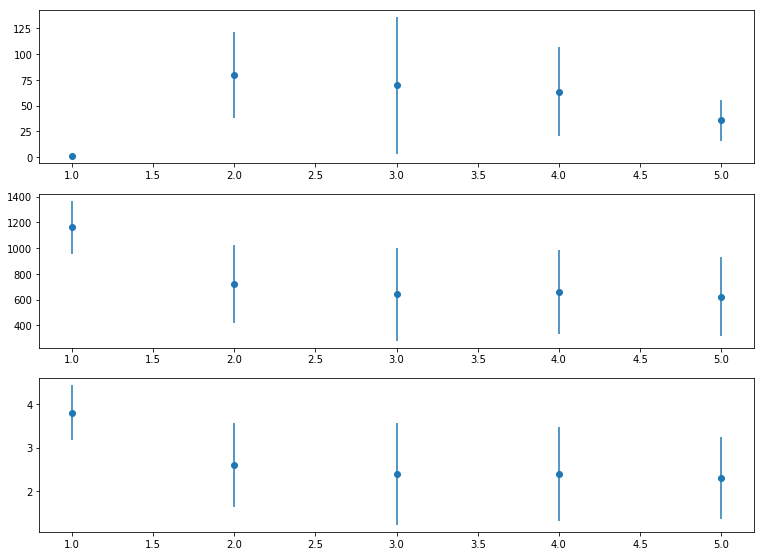

In [3]:
fig = figure(figsize = (12.8, 9.6))

im1 = fig.add_subplot(3, 1, 1)
im2 = fig.add_subplot(3, 1, 2)
im3 = fig.add_subplot(3, 1, 3)

ordine = [1, 2, 3, 4, 5]

im1.errorbar(ordine, medie_attesa, dstd_attesa, label='tempo di attesa', fmt='o')
im2.errorbar(ordine, medie_partecipanti, dstd_partecipanti, label='partecipanti', fmt='o')
im3.errorbar(ordine, medie_durata, dstd_durata, label='durata', fmt='o')

### Analizzo dati sui tempi di attesa

In [4]:
#trasformo in array e reshape per usare LinearRegression() di scikit

Ordine = array(ordine) 
Medie_attesa = array(medie_attesa)
Medie_partecipanti = array(medie_partecipanti)
Medie_durata = array(medie_durata)

Ordine = Ordine.reshape(-1,1)
Medie_attesa = Medie_attesa.reshape(-1,1)
Medie_partecipanti = Medie_partecipanti.reshape(-1,1)
Medie_durata = Medie_durata.reshape(-1,1)

_definendo funzione linreg_

In [5]:
def LinReg(X,Y, erroriY, errormode=False):
    
    #funziona con arrays e metodo PseudoInversa, devo aggiungere a dati X una colonna di uno
    #restituisce array (q, m) o
    inversa = np.linalg.inv(X.T.dot(X))
    c_errori = inversa.dot(X.T)
    w = c_errori.dot(Y)
    
    #calcolo errori sui coefficienti con propag.errore (hp: variabili scorrelate -> ordini delle rivolte scorrelati)
    if errormode == True:
        err_q = sqrt(c_errori[0,:].dot(erroriY))
        err_m = sqrt(c_errori[1,:].dot(erroriY))
        return array([err_q, err_m]).reshape(1,2)
    else:
        return w.reshape(1,2)

In [6]:
#modifico dati X per poter usare metodo con pseudoinversa
OrdineLinR = insert(Ordine, 0, ones(len(Ordine)), axis=1)

In [7]:
print('Q ed m: ', LinReg(OrdineLinR, Medie_attesa, Dstd_attesa))
print('Errori su q e m: ', LinReg(OrdineLinR, Medie_attesa, Dstd_attesa, errormode=True))

Q ed m:  [[34.03333333  5.3       ]]
Errori su q e m:  [[4.74261031 1.98607558]]


_usando scikit_

In [8]:
model = LinearRegression()

In [9]:
attesa = model.fit(Ordine, Medie_attesa)
m_attesa = attesa.coef_
q_attesa = attesa.intercept_
fit_attesa = q_attesa + m_attesa*(Ordine)

print('m= ', m_attesa)
print('q= ', q_attesa)

m=  [[5.3]]
q=  [34.03333333]


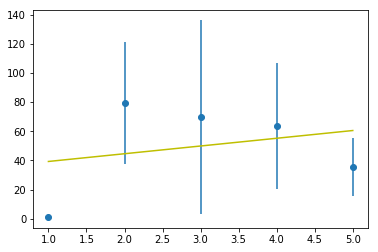

In [10]:
errorbar(Ordine, medie_attesa, dstd_attesa, fmt='o')
plot(ordine, fit_attesa, 'y-')

In [11]:
def chiquadronorm(oss, fit, dstdoss, ddof, aiuto=False, norm=True):
    #prende liste monodimensionali come argomenti
    scarti = []
    scartierrore = []
    scartierrorequadri = []
    for i in range(len(oss)):
        scarti.append(oss[i]-fit[i])
        scartierrore.append(scarti[i] / dstdoss[i])
        scartierrorequadri.append(scartierrore[i] * scartierrore[i])
        if (aiuto==True):
            print('scarti= ', scarti[i])
            print('scartierrore= ', scartierrore[i])
            print('scartierrorequadri= ', scartierrorequadri[i])
            
    chiquadro=sum(scartierrorequadri)
    chiquadroreg=chiquadro/ddof
    
    if(norm==True):
        return (chiquadroreg)
    else:
        return (chiquadro)
    

In [12]:
#trasformo array in lista 1d
Fit_attesa=[]
for i in range(len(medie_attesa)):
    Fit_attesa.append(fit_attesa[i,0])   

In [13]:
chiquadronorm(medie_attesa, Fit_attesa, dstd_attesa, 3, norm=False)

3172.139716110429

La retta non interpola bene i dati, rigetto ipotesi nulla. Principalmente dovuto al contributo della rivolta al primo ordine, con grande scarto e errore molto basso, per cui porta un contributo decisivo per il chiquadrato

### Analizzo dati sui partecipanti


_usando LinReg()_

In [15]:
print('Q ed m: ', LinReg(OrdineLinR, Medie_partecipanti, Dstd_partecipanti))
print('Errori su q e m: ', LinReg(OrdineLinR, Medie_partecipanti, Dstd_partecipanti, errormode=True))

Q ed m:  [[1102.98 -114.04]]
Errori su q e m:  [[15.26311674  4.7906146 ]]



_usando scikit_

In [14]:
partecipanti = model.fit(Ordine, Medie_partecipanti)
m_partecipanti = partecipanti.coef_
q_partecipanti = partecipanti.intercept_
fit_partecipanti = q_partecipanti + m_partecipanti*(Ordine)

print('m= ', m_partecipanti)
print('q= ', q_partecipanti)

m=  [[-114.04]]
q=  [1102.98]


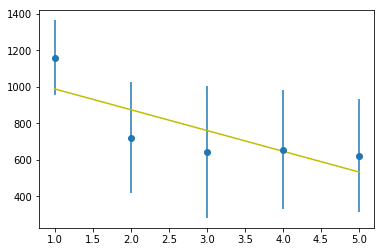

In [16]:
errorbar(Ordine, medie_partecipanti, dstd_partecipanti, fmt='o')
plot(Ordine, fit_partecipanti, 'y-')

In [17]:
Fit_partecipanti=[]
for i in range(len(medie_partecipanti)):
    Fit_partecipanti.append(fit_partecipanti[i,0])

In [18]:
chiquadronorm(medie_partecipanti, Fit_partecipanti, dstd_partecipanti, 3)

0.3815477225259647

Chiquadro ridotto molto basso, non posso rigettare ipotesi nulla. Ho molto errore sui dati. 

Ciononostante non posso escludere l'ipotesi che quella sia la retta giusta: guardo se il coefficiente angolare della retta fittata è paragonabile con lo zero

In [48]:
mteo_partecipanti = 0
m_partecipanti
errori_coeff_partecipanti = LinReg(OrdineLinR, Medie_partecipanti, Dstd_partecipanti, errormode=True)
errm_partecipanti = errori_coeff_partecipanti[0,1]

t=((mteo_partecipanti-m_partecipanti)/errm_partecipanti)[0,0]
print('t= ', t)

t=  23.80487879597106


Vedo come il valore teorico per la pendenza (0 nel caso di indipendenza degli eventi) sia 23 barre d'errore distante dal valore ottenuto con fit. Non sono quindi paragonabili

### Analizzo dati su durata

_usando LinReg()_

In [42]:
print('Q ed m: ', LinReg(OrdineLinR, Medie_durata, Dstd_durata))
print('Errori su q e m: ', LinReg(OrdineLinR, Medie_durata, Dstd_durata, errormode=True))

Q ed m:  [[ 3.66 -0.32]]
Errori su q e m:  [[0.85836926 0.27227403]]


_usando scikit_

In [20]:
durata = model.fit(Ordine, Medie_durata)
m_durata = durata.coef_
q_durata = durata.intercept_
fit_durata = q_durata + m_durata*(Ordine)

print('m= ', m_durata)
print('q= ', q_durata)

m=  [[-0.32]]
q=  [3.66]


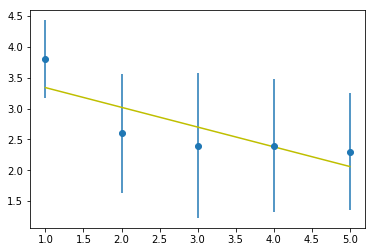

In [21]:
errorbar(Ordine, medie_durata, dstd_durata, fmt='o')
plot(Ordine, fit_durata, 'y-')

In [22]:
Fit_durata=[]
for i in range(len(medie_durata)):
    Fit_durata.append(fit_durata[i,0])

In [23]:
chiquadronorm(medie_durata, Fit_durata, dstd_durata, 3)

0.2825562448304382

Chiquadro normalizzato è bassissimo, ho molto errore sui dati.
Provo a confrontare la pendenza trovata con lo zero:

In [49]:
errori_coeff_durata = LinReg(OrdineLinR, Medie_durata, Dstd_durata, errormode=True)
errm_durata = errori_coeff_durata[0,1]
t = ((0 - m_durata)/errm_durata)[0,0]
print('t= ',t)

t=  1.1752865503968806


Le due quantità sono paragonabili

**OSSERVAZIONI**

La prima rivolta è la più lunga e partecipata: non ci sono carcerati

Provo a rifare gli esperimenti e le analisi considerando 5 eventi escluso il primo (2 gdl sembrano pochini). Cambio notebook
